`conda install matplotlib`

In [32]:
import enum
import pickle
from pprint import pprint

import matplotlib.pyplot as plt
import pandas as pd

#matplotlib inline

In [33]:
df = pd.read_csv('data/raw/reviews.csv')

In [34]:
df

,rating,review
0,50,This is one of the best hotels I've ever staye...
1,50,Everything about this hotel was awesome. The s...
2,50,Our tour group stayed here for two nights. Th...
3,50,Excellent service at Porta Hotel Antigua. From...
4,50,I almost always stay at Hotel Antigua when I t...
...,...,...
15677,40,Last week I stayed at the Camino Real in Antig...
15678,50,My boyfriend was in Guate on business and we d...
15679,40,I stayed at Camino Real Antigua for a conferen...
15680,50,"Was in Antigua for the weekend, attending an A..."


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15682 entries, 0 to 15681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  15682 non-null  int64 
 1   review  15682 non-null  object
dtypes: int64(1), object(1)
memory usage: 245.2+ KB


In [36]:
df['review']

0        This is one of the best hotels I've ever staye...
1        Everything about this hotel was awesome. The s...
2        Our tour group stayed here for two nights.  Th...
3        Excellent service at Porta Hotel Antigua. From...
4        I almost always stay at Hotel Antigua when I t...
                               ...                        
15677    Last week I stayed at the Camino Real in Antig...
15678    My boyfriend was in Guate on business and we d...
15679    I stayed at Camino Real Antigua for a conferen...
15680    Was in Antigua for the weekend, attending an A...
15681    very nice little hotel, brand new, with lots o...
Name: review, Length: 15682, dtype: object

In [37]:
df['rating'] = df['rating'].astype(dtype='int64')

<AxesSubplot:ylabel='Frequency'>

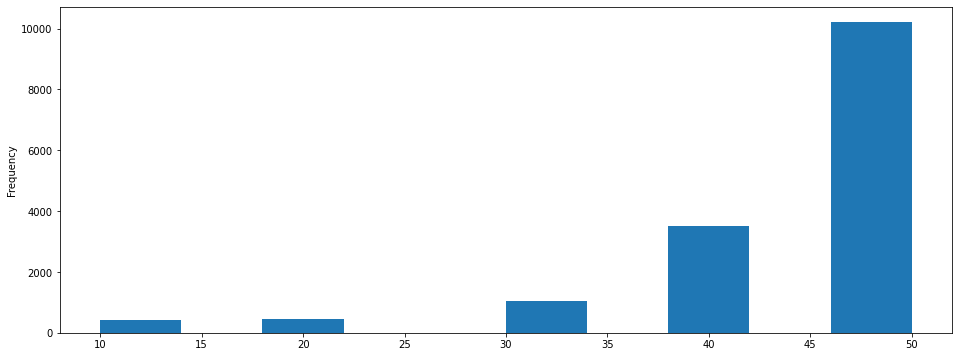

In [38]:
fig = plt.figure(figsize=(16,6))
df['rating'].plot.hist()

In [39]:
df.groupby('rating').count()

,review
rating,
10,428
20,456
30,1060
40,3525
50,10213


In [40]:
class Sentiments(enum.Enum):
    POS = 'POS'
    NEG = 'NEG'

In [41]:
hyper_sen_trshld = 50

In [42]:
df['sentiment'] = df['rating'].apply(lambda x: Sentiments.POS if x >= hyper_sen_trshld else Sentiments.NEG)

In [43]:
df["is_50"] = df["rating"].apply(lambda x: x==50)

In [44]:
df

,rating,review,sentiment,is_50
0,50,This is one of the best hotels I've ever staye...,Sentiments.POS,True
1,50,Everything about this hotel was awesome. The s...,Sentiments.POS,True
2,50,Our tour group stayed here for two nights. Th...,Sentiments.POS,True
3,50,Excellent service at Porta Hotel Antigua. From...,Sentiments.POS,True
4,50,I almost always stay at Hotel Antigua when I t...,Sentiments.POS,True
...,...,...,...,...
15677,40,Last week I stayed at the Camino Real in Antig...,Sentiments.NEG,False
15678,50,My boyfriend was in Guate on business and we d...,Sentiments.POS,True
15679,40,I stayed at Camino Real Antigua for a conferen...,Sentiments.NEG,False
15680,50,"Was in Antigua for the weekend, attending an A...",Sentiments.POS,True


<AxesSubplot:>

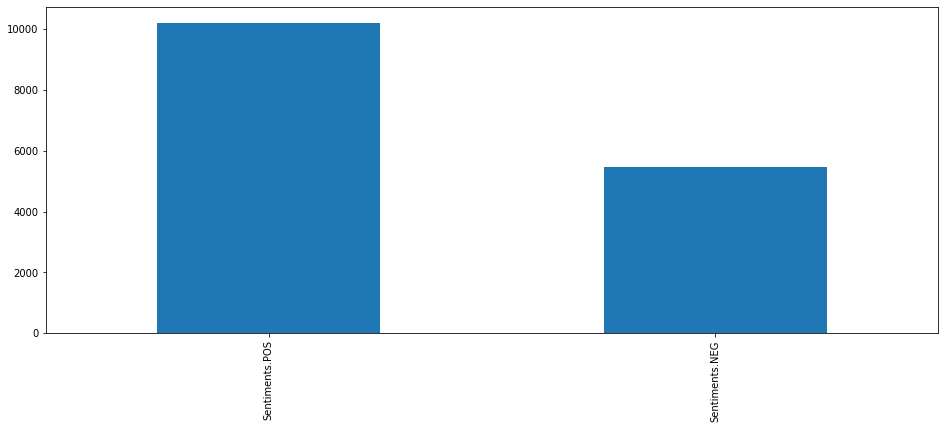

In [45]:
fig = plt.figure(figsize=(16,6))
df['sentiment'].value_counts().plot(kind='bar')

In [46]:
df['sentiment'].value_counts()

Sentiments.POS    10213
Sentiments.NEG     5469
Name: sentiment, dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15682 entries, 0 to 15681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating     15682 non-null  int64 
 1   review     15682 non-null  object
 2   sentiment  15682 non-null  object
 3   is_50      15682 non-null  bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 383.0+ KB


In [48]:
data_classes = {sentiment.value: df[df['sentiment'] == sentiment]['review'].values.tolist() for sentiment in Sentiments}

In [49]:
print(data_classes)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [50]:
print(data_classes['NEG'])

["Casa del Arco is a very conveniently located bed and breakfast place in Antigua Guatemala. It's just two minute walking distance from Parque Central and the Arch of Catalina. In fact given its central location, just about every attraction in the town is accessible by walk. The place is a cosy nook with few rooms. That said, you can almost have their little lounge to yourself when you want. The rooms are tastefully done with Guatemalan textile and clean. The bed was comfortable as well. The only issue I had was the lack of ventilation. The room window opened to the steps just besides the room that would compromise my privacy but as I had mentioned, there are few rooms and very less people in the property so it was fine. The highlight of the place is the breakfast cooked by the", 'Good location on the NW of town, especially if youre going to Antiguena spanish school. 100q for good sized private twin room with shared bathroom - great price Nice ish garden with a swing and hamock Basic b

In [51]:
with open(r"data/interim/review_classes.pkl", "wb") as output_file:
    pickle.dump(data_classes, output_file)

In [52]:
data_classes['NEG']

["Casa del Arco is a very conveniently located bed and breakfast place in Antigua Guatemala. It's just two minute walking distance from Parque Central and the Arch of Catalina. In fact given its central location, just about every attraction in the town is accessible by walk. The place is a cosy nook with few rooms. That said, you can almost have their little lounge to yourself when you want. The rooms are tastefully done with Guatemalan textile and clean. The bed was comfortable as well. The only issue I had was the lack of ventilation. The room window opened to the steps just besides the room that would compromise my privacy but as I had mentioned, there are few rooms and very less people in the property so it was fine. The highlight of the place is the breakfast cooked by the",
 'Good location on the NW of town, especially if youre going to Antiguena spanish school. 100q for good sized private twin room with shared bathroom - great price Nice ish garden with a swing and hamock Basic 